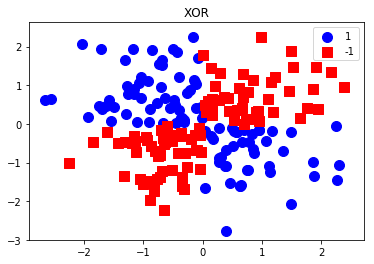

In [3]:
# from matplotlib import font_manager, rc
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf")
# rc('font', family= font_name)

from sklearn.svm import SVR
import numpy as np
n_samples, n_features = 10, 5
np.random.seed(0)
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)
clf = SVR(C=1.0, epsilon=0.2) #epsilon 상수를 이야기한다. 규제를 사용하지 않을때. 
clf.fit(X, y)
#숫자는 점수와 부동소수점이 있다. 점수는 가산기, 부동소수점은 연산기에서 처리. 
#kernel: 'linear', 'poly, 'rbf', 'sigmoid' 'precomputed'
#gamma: 'poly', 'rbf', 'sigmoid'
#randn: 표준정규분포에서 값을 생성. 

import numpy as np
import matplotlib.pylab as plt
np.random.seed(0)
#정규분포이기 때문에 값의 범위는 ~OO ~ OO(무한대에서 무한대). +,-값을 가지고 있다.
#xor은 (+,-)가 다를때 참이다. 
X_xor = np.random.randn(200,2) #행200개, 열2개.
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0) #다를 때 참, 같을 때 거짓.
y_xor =  np.where(y_xor, 1, -1) #네덩어리로 데이터가 만들어졌다. 
plt.scatter(X_xor[y_xor==1,0], X_xor[y_xor==1,1], c='b', marker='o', label='1', s=100)
plt.scatter(X_xor[y_xor==-1,0], X_xor[y_xor==-1,1], c='r', marker='s', label='-1', s=100)
plt.ylim(-3.0)
plt.legend()
plt.title("XOR")
plt.show()

def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, alpha=0.5)
    plt.scatter(X[y==1,0], X[y==1,1], c='b', marker='o', label='+1', s=100)
    plt.scatter(X[y==-1,0], X[y==-1,1], c='r', marker='s', label='-1', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.show()

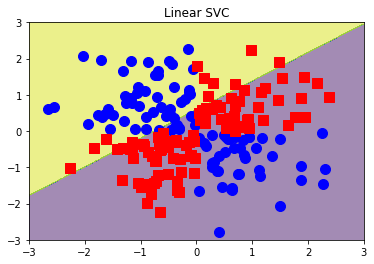

In [5]:
from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_xor,y_xor)
plot_xor(X_xor, y_xor, svc, "Linear SVC")

IndexError: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 200

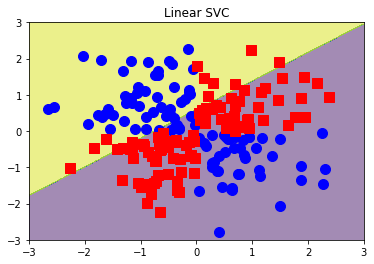

In [6]:
from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, svc, "Linear SVC") #SVC가 분류를 못시키고 있다.
#데이터에 조작을 가해서 다시 돌려보자
from sklearn.preprocessing import FunctionTransformer
def basis(X): #데이터를 고차원으로 변형.
    return np.vstack([X[:,0]**2,
                      np.sqrt(2)*X[:,0]*X[:,1], X[:,1]**2]).T
X = np.arange(8).reshape(4,2)
X
X_xor2 = FunctionTransformer(basis).fit_transform(X)
plt.scatter(X_xor2[y_xor==1,0], X_xor2[y_xor==1,1], c="b", s=50)
plt.scatter(X_xor2[y_xor==-1,0], X_xor2[y_xor==-1,1], c="r", s=50)
plt.show()

#여러개의 함수를 이용해서 데이터를 변형하고자 할 때 pipeline활용
from sklearn.pipeline import Pipeline
basismodel = Pipeline([("basis", FunctionTransformer(basis)),
                       ("svc", SVC(kernel="linear"))]).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, basismodel, "함수를 적용한 SVC")

#다항식 kernel gamma는 모양을 통제한다.
#gamma default는 'auto'다. => 1/feature로 계산되어진다. 
#coff: Independent term in kernel fucntion: 'poly' and 'sigmoid'.
polysvc = SVC(kernel="poly", degree=2, gamma=1, coef0=0).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, polysvc, "Polynomila SVC")
polysvc = SVC(kernel="poly", degree=2, gamma=0.3, coef0=0).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, polysvc, "Polynomila SVC") #감마는 모양을 통제한다. 
#방사!!
rbfsvc = SVC(kernel="rbf").fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, rbfsvc, "RBF SVC") #방사형으로 바꿔준다.

In [ ]:
# 다음 데이터를 로딩한 다음 4개의 kernel을 적용해 보고 이를 시각화 하시오
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X=iris.data[:]

In [ ]:
iris = load_iris()
X = iris.data[:, [0,1,2,3]]
X = iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc= StandardScaler()
sc.fit(X_train)
X_train_std= sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
#4차원 데이터를 3차원으로 시각화
import os
from matplotlib import pylab
from mpl_toolkits.mplot3d import Axes3D
fig = pylab.figure(figsize=(10,4))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')
markers = ['o', 6, '*']
colors = ['r', 'g', 'b']

M = MDS(n_components=3, metric=True, random_state=0, dissimilarity='euclidean')
A = M.fit_transform(X_test_std)

ax.scatter(A[:,0], A[:,1], A[:,2], c=[{0:"b", 1:"g", 2:"r"}[t] for t in y], 
           edgecolor='black')
for cl, color, marker in zip(np.unique(y), colors, markers):
    ax.scatter(
            A[y==cl][:,0], A[y==cl][:, 1], A[y==cl][:,2], c=color, marker=marker,
            edgecolor='black')
pylab.title("3차원에서 iris MDS")
ax.view_init(10, -15)
filename = "mds_demo_1.png"
pylab.savefig(os.path.join('./', filename), bbox_inches="tight")
plt.show()

In [ ]:
import mglearn
plt.figure(fig.size=(8, 8))
mglearn.discrete_scatter(X_pca[:])

In [ ]:
# screeplot
# 최적의 components를 선택하고 그 떄의 score를 출력하시오